# Importing Libraries 

In [1]:
!pip install tensorflow-gpu
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Fashion MNIST dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
print("Training data shape:", train_images.shape, train_labels.shape)
print("Testing data shape:", test_images.shape, test_labels.shape)


Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


In [ ]:
# Normalizing the pixel values 
train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
# label encoded to one hot encoded labels
num_classes = 10 
y_train = tf.keras.utils.to_categorical(train_labels, num_classes)
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)

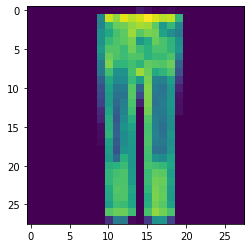

In [ ]:
plt.imshow(test_images[15])

In [ ]:
# Model Architecture 

model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
# Training and compiling the model 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(train_images.reshape(-1, 28, 28, 1),y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.5090 - accuracy: 0.8147
Epoch 2/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.3307 - accuracy: 0.8797
Epoch 3/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2817 - accuracy: 0.8964
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2481 - accuracy: 0.9101
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2242 - accuracy: 0.9174
Epoch 6/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2040 - accuracy: 0.9248
Epoch 7/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1865 - accuracy: 0.9315
Epoch 8/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1702 - accuracy: 0.9383
Epoch 9/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1571 - accuracy: 0.9411
Epoch 10/10
1875/1875 [==============================] - 59s 32m

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images.reshape(-1, 28, 28, 1), y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2888 - accuracy: 0.9067


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.9067000150680542


In [ ]:
model.save("FMnist.h5")

# Linneaus_5 Dataset

**This dataset was taking too long to train. Therefore, I decided to use gpu from colab to train the model**  

In [4]:
path = "/content/drive/MyDrive/DL_DATA/Linnaeus_5"

## With RGB Images

In [ ]:
gen_train = ImageDataGenerator(
    rescale=1./255, # rescale pixel values between 0 and 1
    rotation_range=20, # randomly rotate images within 20 degrees
    width_shift_range=0.1, # randomly shift images horizontally by 10%
    height_shift_range=0.1, # randomly shift images vertically by 10%
    shear_range=0.1, # randomly apply shearing transformations
    zoom_range=0.1, # randomly zoom in on images
    horizontal_flip=True, # randomly flip images horizontally
)

gen_test = gen_train = ImageDataGenerator(rescale=1./255)

train_gen = gen_train.flow_from_directory(path+"/train", batch_size = 64, class_mode = 'categorical', target_size = (32, 32))
test_gen = gen_test.flow_from_directory(path+"/test", batch_size = 64, class_mode = 'categorical', target_size=(32, 32))

Found 6000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


In [ ]:
with tf.device('/GPU:0'):
  model = keras.Sequential([
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(5, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(train_gen, steps_per_epoch = 40, epochs = 10)


Epoch 1/10
40/40 [==============================] - 334s 8s/step - loss: 1.5446 - accuracy: 0.2613
Epoch 2/10
40/40 [==============================] - 167s 4s/step - loss: 1.4767 - accuracy: 0.3251
Epoch 3/10
40/40 [==============================] - 106s 3s/step - loss: 1.4108 - accuracy: 0.3789
Epoch 4/10
40/40 [==============================] - 56s 1s/step - loss: 1.2851 - accuracy: 0.4513
Epoch 5/10
40/40 [==============================] - 33s 824ms/step - loss: 1.1809 - accuracy: 0.5020
Epoch 6/10
40/40 [==============================] - 15s 362ms/step - loss: 1.1439 - accuracy: 0.5250
Epoch 7/10
40/40 [==============================] - 11s 273ms/step - loss: 1.0727 - accuracy: 0.5688
Epoch 8/10
40/40 [==============================] - 10s 254ms/step - loss: 1.0686 - accuracy: 0.5645
Epoch 9/10
40/40 [==============================] - 6s 147ms/step - loss: 1.0170 - accuracy: 0.5932
Epoch 10/10
40/40 [==============================] - 7s 165ms/step - loss: 1.0418 - accuracy: 0.5853


In [ ]:
with tf.device('/GPU:0'):
  history1 = model.fit(train_gen, steps_per_epoch = 40, epochs = 10)



Epoch 1/10
40/40 [==============================] - 5s 125ms/step - loss: 0.9641 - accuracy: 0.6160
Epoch 2/10
40/40 [==============================] - 5s 113ms/step - loss: 0.9702 - accuracy: 0.6141
Epoch 3/10
40/40 [==============================] - 4s 109ms/step - loss: 0.9400 - accuracy: 0.6238
Epoch 4/10
40/40 [==============================] - 4s 102ms/step - loss: 0.8829 - accuracy: 0.6572
Epoch 5/10
40/40 [==============================] - 5s 114ms/step - loss: 0.8780 - accuracy: 0.6488
Epoch 6/10
40/40 [==============================] - 4s 109ms/step - loss: 0.8718 - accuracy: 0.6629
Epoch 7/10
40/40 [==============================] - 4s 101ms/step - loss: 0.8344 - accuracy: 0.6730
Epoch 8/10
40/40 [==============================] - 5s 113ms/step - loss: 0.8936 - accuracy: 0.6513
Epoch 9/10
40/40 [==============================] - 4s 107ms/step - loss: 0.7956 - accuracy: 0.6832
Epoch 10/10
40/40 [==============================] - 4s 103ms/step - loss: 0.7939 - accuracy: 0.6910

In [ ]:
with tf.device('/GPU:0'):
  history2 = model.fit(train_gen, steps_per_epoch = 40, epochs = 20)



Epoch 1/20
40/40 [==============================] - 4s 105ms/step - loss: 0.7410 - accuracy: 0.7146
Epoch 2/20
40/40 [==============================] - 4s 109ms/step - loss: 0.7102 - accuracy: 0.7203
Epoch 3/20
40/40 [==============================] - 4s 102ms/step - loss: 0.6497 - accuracy: 0.7524
Epoch 4/20
40/40 [==============================] - 4s 106ms/step - loss: 0.6441 - accuracy: 0.7625
Epoch 5/20
40/40 [==============================] - 4s 107ms/step - loss: 0.5969 - accuracy: 0.7773
Epoch 6/20
40/40 [==============================] - 4s 108ms/step - loss: 0.6051 - accuracy: 0.7676
Epoch 7/20
40/40 [==============================] - 4s 112ms/step - loss: 0.5573 - accuracy: 0.7863
Epoch 8/20
40/40 [==============================] - 4s 109ms/step - loss: 0.5682 - accuracy: 0.7750
Epoch 9/20
40/40 [==============================] - 4s 101ms/step - loss: 0.5123 - accuracy: 0.8148
Epoch 10/20
40/40 [==============================] - 4s 107ms/step - loss: 0.4398 - accuracy: 0.8404

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
model.save("L5RGB_.h5")

## With Grayscale Images

In [13]:


# define the root directory that contains the different image directories
root_dir = path+'/train'

# initialize empty lists for images and labels
images = []
labels = []

# loop through each subdirectory in the root directory
for subdir in os.listdir(root_dir):
    # define the subdirectory path
    subdir_path = os.path.join(root_dir, subdir)
    # loop through each file in the subdirectory
    for filename in os.listdir(subdir_path):
        # define the file path
        file_path = os.path.join(subdir_path, filename)
        # read the image using OpenCV
        img = cv2.imread(file_path)
        # convert the image to grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # append the image to the list
        images.append(img)
        # append the label to the list
        labels.append(subdir)
        
# convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# perform label encoding on the string labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# perform one-hot encoding on the numerical labels
labels = to_categorical(labels)

# print the shape of the arrays
print('Shape of images array:', images.shape)
print('Shape of labels array:', labels.shape)


Shape of images array: (6000, 32, 32)
Shape of labels array: (6000, 5)


In [20]:
with tf.device('/GPU:0'):
  model1 = keras.Sequential([
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(5, activation='softmax')
  ])
  model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  history = model1.fit(images,labels, steps_per_epoch = 40, epochs = 25)


Epoch 1/25
40/40 [==============================] - 2s 7ms/step - loss: 4.0697 - accuracy: 0.2073
Epoch 2/25
40/40 [==============================] - 0s 6ms/step - loss: 1.5763 - accuracy: 0.2705
Epoch 3/25
40/40 [==============================] - 0s 5ms/step - loss: 1.5040 - accuracy: 0.3283
Epoch 4/25
40/40 [==============================] - 0s 5ms/step - loss: 1.4505 - accuracy: 0.3675
Epoch 5/25
40/40 [==============================] - 0s 5ms/step - loss: 1.3967 - accuracy: 0.3937
Epoch 6/25
40/40 [==============================] - 0s 5ms/step - loss: 1.3487 - accuracy: 0.4198
Epoch 7/25
40/40 [==============================] - 0s 5ms/step - loss: 1.2891 - accuracy: 0.4577
Epoch 8/25
40/40 [==============================] - 0s 5ms/step - loss: 1.2454 - accuracy: 0.4798
Epoch 9/25
40/40 [==============================] - 0s 5ms/step - loss: 1.1552 - accuracy: 0.5262
Epoch 10/25
40/40 [==============================] - 0s 5ms/step - loss: 1.0932 - accuracy: 0.5560
Epoch 11/25
40/40 [

In [22]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [24]:
model1.save("L5GS.h5")